### Exploring bioRad data

In [36]:
library(bioRad)

In [37]:
setwd('/gws_gpfs/projects/project-urban_birds/workspace')

In [39]:
load("./share/data/KBGM2015/KBGM2015.RData")

In [41]:
# set session time zone to UTC
Sys.setenv(TZ = "UTC")

In [42]:
# data are stored in a vpts (vertical profile time series) object:
data

                   Irregular time series of vertical profiles (class vpts)

           radar:  KBGM 
      # profiles:  4722 
time range (UTC):  2015-03-01 22:41:40 - 2015-11-15 11:37:27 
   time step (s):  min: 580     max:  4115471 

In [48]:
data$datetime

   [1] "2015-03-01 22:41:40 UTC" "2015-03-01 23:10:51 UTC"
   [3] "2015-03-01 23:40:02 UTC" "2015-03-02 00:09:14 UTC"
   [5] "2015-03-02 00:48:09 UTC" "2015-03-02 01:17:20 UTC"
   [7] "2015-03-02 01:46:31 UTC" "2015-03-02 02:15:42 UTC"
   [9] "2015-03-02 02:44:53 UTC" "2015-03-02 03:14:04 UTC"
  [11] "2015-03-02 03:46:06 UTC" "2015-03-02 04:15:18 UTC"
  [13] "2015-03-02 04:44:30 UTC" "2015-03-02 05:13:42 UTC"
  [15] "2015-03-02 05:42:53 UTC" "2015-03-02 06:12:04 UTC"
  [17] "2015-03-02 06:41:15 UTC" "2015-03-02 07:10:26 UTC"
  [19] "2015-03-02 07:39:37 UTC" "2015-03-02 08:08:47 UTC"
  [21] "2015-03-02 08:47:43 UTC" "2015-03-02 09:16:54 UTC"
  [23] "2015-03-02 09:46:05 UTC" "2015-03-02 10:15:16 UTC"
  [25] "2015-03-02 10:44:27 UTC" "2015-03-02 11:13:38 UTC"
  [27] "2015-03-02 22:49:27 UTC" "2015-03-02 23:18:39 UTC"
  [29] "2015-03-02 23:47:49 UTC" "2015-03-03 00:17:00 UTC"
  [31] "2015-03-03 00:46:11 UTC" "2015-03-03 01:15:21 UTC"
  [33] "2015-03-03 01:44:31 UTC" "2015-03-03 02:13:42 UT

In [49]:
data$height

[1]  519  619  719  819  919 1019 1119 1219 1319 1419 1519 1619 1719 1819 1919
[16] 2019 2119 2219 2319 2419 2519 2619 2719 2819 2919 3019 3119 3219 3319 3419

In [51]:
data$timesteps

Time differences in secs
   [1]    1751    1751    1752    2335    1751    1751    1751    1751    1751
  [10]    1922    1752    1752    1752    1751    1751    1751    1751    1751
  [19]    1750    2336    1751    1751    1751    1751    1751   41749    1752
  [28]    1750    1751    1751    1750    1750    1751    1750    1751    1751
  [37]    1901    1751    1751    1751    2335    1751    1751    1751    1751
  [46]    1751    1752    1751    1751    1752    1752   41726    1743    1743
  [55]    1743    1742    1899    1792    1793    1792    2068    1748    1750
  [64]    1898    1751    1751    1750    1751    1751    1751    1750    1751
  [73]    1751    2000    1660    2009    1714   41395    1748    1747    2328
  [82]    1746    1745    1746    1746    1747    1746    1749    1747    3644
  [91]    1746    1747    2330    1745    1748    1748    1747    1748    1748
 [100]    1748    1748    1748   41748    1752    1754    1752    1753    1754
 [109]    1754    1754    1

In [52]:
data$attributes

$where
  interval levels      lat       lon height
1      100     30 42.19972 -75.98472    519

$what
                   source
1 KBGM20150301_224140.csv

$how
  wavelength        task
1       10.6 UMASS Cajun

In [56]:
data$data$

1.7629300,2.0277691,1.8927525,1.8694049,0.9307169,1.1163874,0.6857424,0.2367190,0.8950735,1.4144173,⋯,9.746544,9.660764,10.531501,11.254157,11.315566,8.724769,7.125134,6.740300,6.725586,2.529028
0.7963003,1.0555537,0.8123386,0.9299540,0.4153186,0.3847690,0.3085536,0.8458772,0.9921063,1.4021167,⋯,10.704828,11.026245,11.163373,12.091248,12.582259,10.096901,9.561971,9.962966,8.423384,4.283116
1.8011052,1.8334573,2.4950067,2.0281492,1.9120618,1.6984433,2.4301151,2.0642916,1.8016603,1.5762197,⋯,11.329806,11.566120,11.687019,12.434756,10.090485,8.224087,8.783146,9.547341,7.651508,5.316282
2.9724655,3.5803308,4.3684616,2.7901431,2.7504836,2.2364650,3.0990545,2.3768323,1.7859960,1.5867499,⋯,11.468208,11.271068,10.453838,10.489709,8.803899,7.959339,8.913587,8.586993,9.760065,4.993948
4.4880070,4.1014386,3.8367551,3.4707629,3.7684350,3.1899082,2.8130640,2.1540656,1.3932349,1.5152975,⋯,12.208070,8.505239,6.225876,6.814607,5.206500,4.225853,6.794689,7.572543,9.026178,2.090094
5.7427049,5.1998926,4.5214218,4.0929257,3.9087660,3.2497272,2.8622759,2.2892302,1.8756616,1.9834673,⋯,8.517747,6.701118,6.125062,7.494119,5.390395,5.660151,8.368843,12.604525,12.056574,5.163070
5.5816203,5.1164839,4.4066210,3.9015987,3.7131407,3.0101822,2.7746220,2.2053180,1.8526117,1.9203947,⋯,8.564558,7.402682,6.821438,8.611210,7.745014,7.851825,10.525465,12.299794,12.727795,9.546662
4.9224044,4.5255456,3.8446259,3.3592925,3.2926123,2.7522874,2.4268778,1.9469110,1.8266508,1.8794670,⋯,7.916767,8.144233,7.681397,9.397542,9.424631,8.971709,11.058830,12.654776,12.822777,12.636037
5.4832063,5.2832082,4.6401602,4.0985616,3.9669178,3.1865019,2.3999011,1.8837271,1.7387601,1.7475236,⋯,9.100093,11.911925,11.873072,10.517401,10.489269,10.256441,11.629704,12.478316,12.217069,11.653350
5.9865211,5.8477316,5.2826265,4.7345322,4.3775209,3.4664877,2.4279748,1.7704603,1.6020666,1.6207489,⋯,11.472005,12.128611,11.281371,10.623879,10.478314,11.030342,11.304897,12.311170,12.209744,10.314353
6.1137019,5.8598704,5.3767743,4.7842888,4.5052989,3.5608902,2.6109128,1.7273684,1.4524663,1.5623012,⋯,11.368690,11.709528,11.087593,10.900704,9.815096,11.838085,11.607519,12.083983,12.185483,6.287530


In [43]:
# let's make a subselection of data by date:
date_range = c("2015-10-01","2015-10-03 12:00")
data_filter = filter_vpts(data,min=date_range[1],max=date_range[2])

Warning message in plot.vpts(data_filter):
“Irregular time-series: missing profiles will not be visible.Use 'regularize_vpts' to make time series regular.”


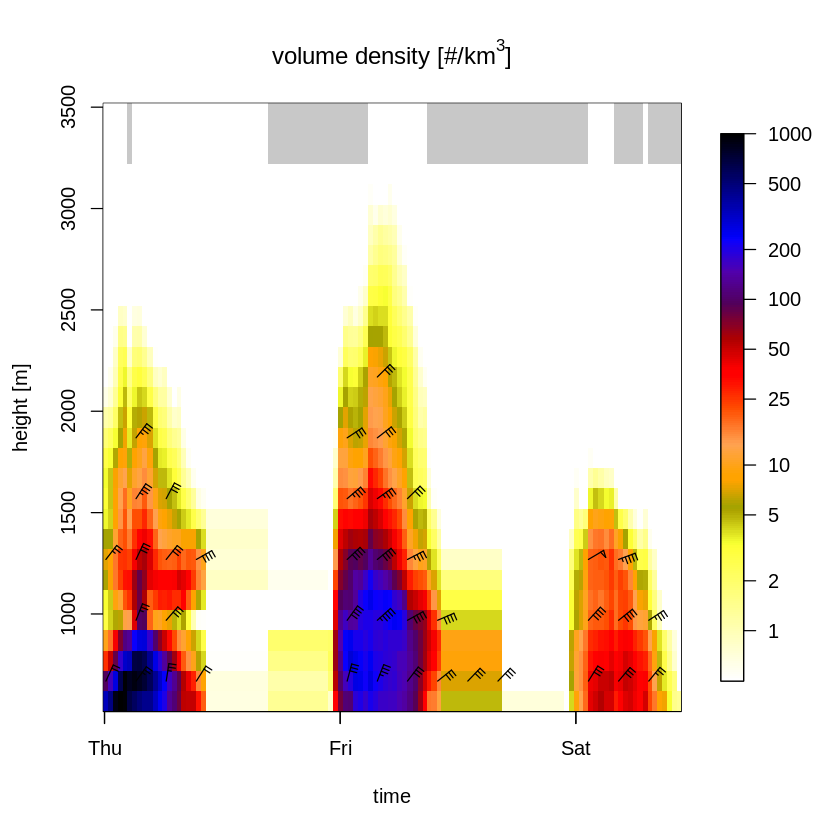

In [44]:
# plot the profiles:
plot(data_filter)

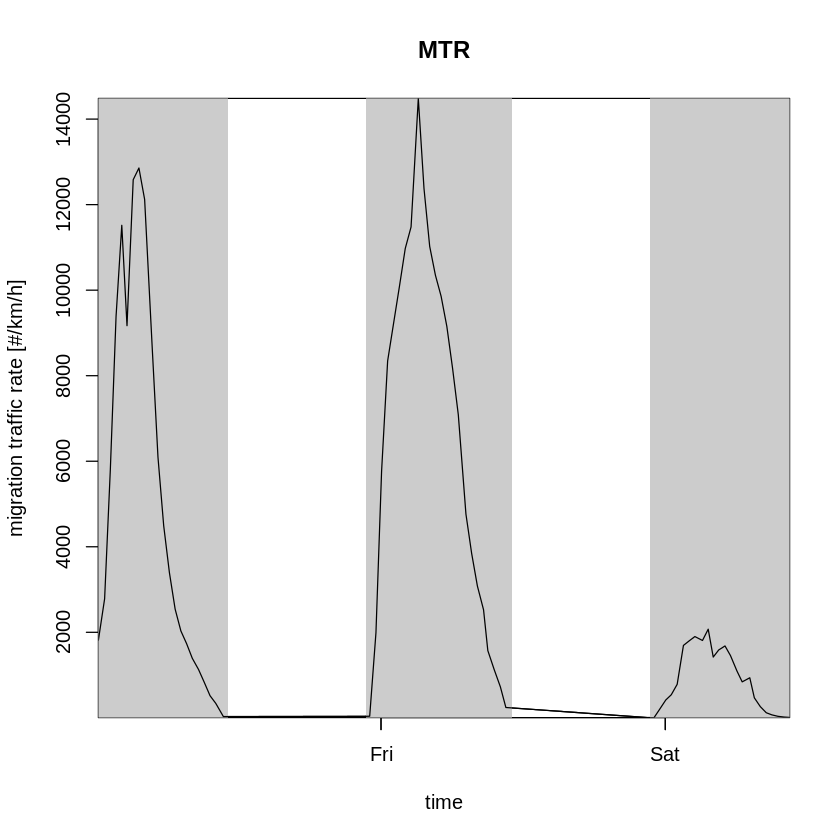

In [45]:
# plot the height-integrated data:
plot(integrate_profile(data_filter))

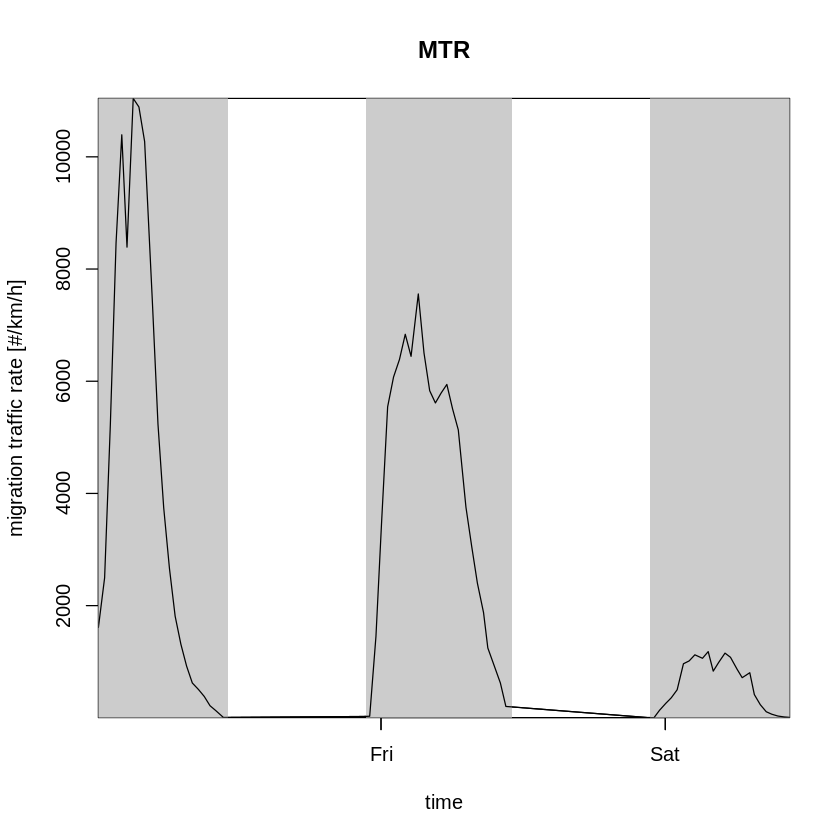

In [46]:
# plot the height-integrated data, only for the 0-1000 meter altitude band:
plot(integrate_profile(data_filter, alt_max=1000))